In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Задание 1. Восстановление пропущенных данных

In [330]:
x = np.arange(0, 10.05, 0.05)
y = np.sin(x)
df = pd.DataFrame({'x': x, 'y': y})

In [331]:
df.shape

(201, 2)

In [332]:
df.head()

,x,y
0,0.00,0.000000
1,0.05,0.049979
2,0.10,0.099833
3,0.15,0.149438
4,0.20,0.198669


In [333]:
df. iloc[-3:]

,x,y
198,9.90,-0.457536
199,9.95,-0.501405
200,10.00,-0.544021


Датасет готов. Теперь удалим некоторые значения y. Чтобы не терять изначальные данные, создадим новый датасет

In [334]:
new_df = df.copy()
new_df.loc[20:30, 'y'] = np.nan  # Удаляем значения y для индексов с 20 по 30
new_df.loc[100:110, 'y'] = np.nan
new_df.loc[55:70, 'y'] = np.nan
new_df.iloc[19:24]

,x,y
19,0.95,0.813416
20,1.00,NaN
21,1.05,NaN
22,1.10,NaN
23,1.15,NaN


Попробуем восстановить пропущенные значения с помощью линейной интерполяции. Линейная интерполяция — это способ вычислить промежуточное значение функции по нескольким уже известным её значениям. Она предполагает вычисление промежуточного значения функции по двум точкам (условно проведя прямую между ними) 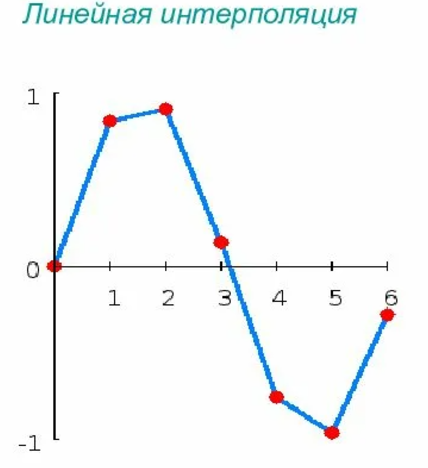

In [335]:
df['y_interpolated'] = new_df['y'].interpolate(method='linear')

Посмотрим результат

In [336]:
df.iloc[19:24]

,x,y,y_interpolated
19,0.95,0.813416,0.813416
20,1.00,0.841471,0.828946
21,1.05,0.867423,0.844477
22,1.10,0.891207,0.860008
23,1.15,0.912764,0.875538


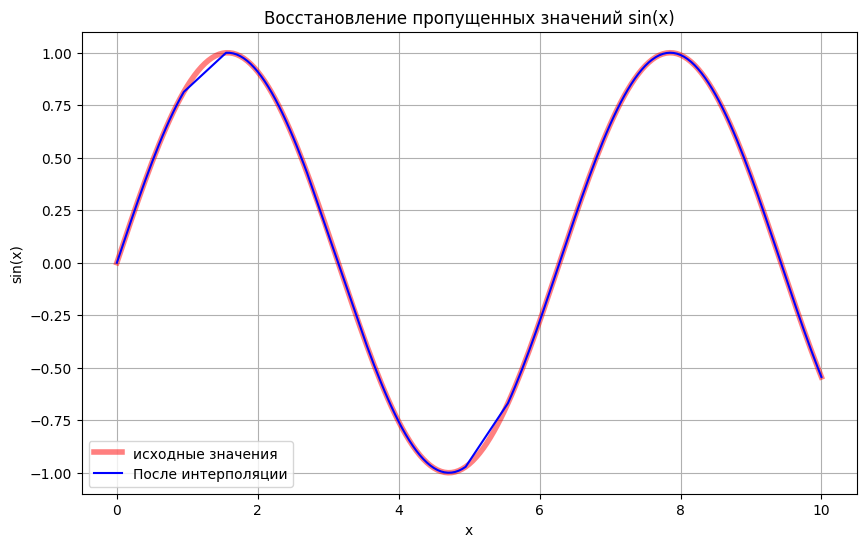

In [337]:
plt.figure(figsize=(10, 6))
plt.plot(df['x'], df['y'], '-', label='исходные значения', color='red', alpha=0.5, linewidth=4)
plt.plot(df['x'], df['y_interpolated'], '-', label='После интерполяции', color='blue')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.title('Восстановление пропущенных значений sin(x)')
plt.grid()
plt.show()

# Задание 2. Редактирование аномалий.

In [338]:
df_anketa = pd.read_csv('Anketa.txt', sep='\t', encoding="cp1251")
df_anketa.head()

,Фамилия,Имя,Отчество,КодАнкеты,"Сумма кредита, руб#"
0,Абаджев,Николай,Васильевич,3049,47000
1,Абаев,Александр,Викторович,3061,32000
2,Алексенко,Дмитрий,Дмитриевич,4012,64000
3,Беляев,Юрий,Алефтинович,3053,25000
4,Бобров,Андрей,Владимирович,4076,105000


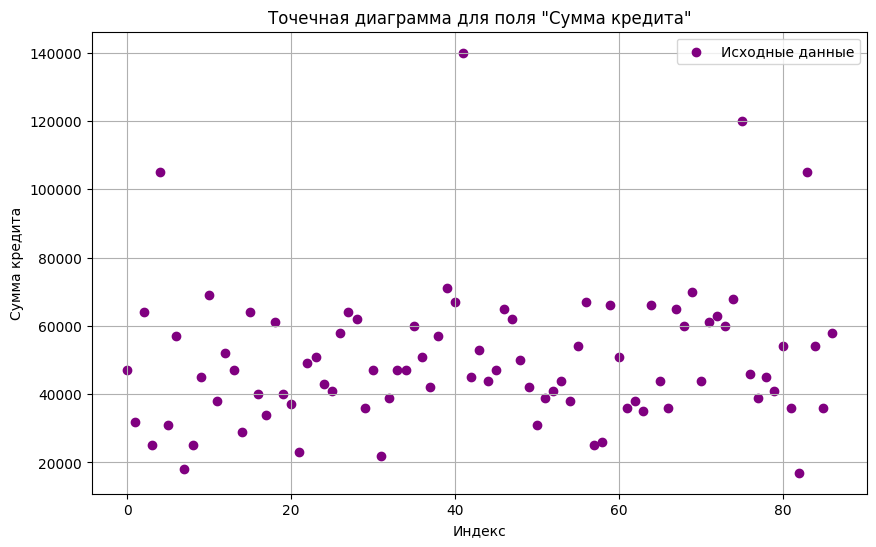

In [339]:
plt.figure(figsize=(10, 6))
plt.scatter(df_anketa.index, df_anketa['Сумма кредита, руб#'], label='Исходные данные', color='purple')
plt.xlabel('Индекс')
plt.ylabel('Сумма кредита')
plt.legend()
plt.title('Точечная диаграмма для поля "Сумма кредита"')
plt.grid()
plt.show()

Аномалии в данных — это отклонения от ожидаемых значений, которые могут указывать на ошибки, выбросы или необычные события. Определение аномалий в данных и их причин является важным шагом в процессе анализа данных, поскольку это помогает повысить качество данных и сделать более точные прогнозы. В нашем случае анамалиями являются точки, где сумма кредита выше 100000

Оборежем значения ниже 1-го перцентиля и выше 99-го перцентиля. Процентиль (персентиль, англ. Percentile) — это значение, которое заданная случайная величина не превышает с фиксированной вероятностью, заданной в процентах. N-й перцентиль - это такое число, что N% элементов массива меньше или равны этому числу. На графике: 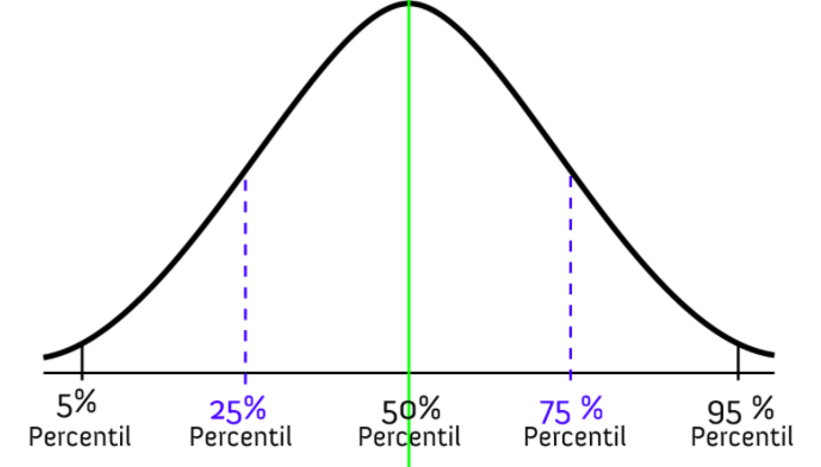

In [340]:
q_low = df_anketa['Сумма кредита, руб#'].quantile(0.01) # 1 перцентиль
q_high = df_anketa['Сумма кредита, руб#'].quantile(0.99) # 99 перцентиль
df_anketa['Сумма кредита редактированная'] = df_anketa['Сумма кредита, руб#'].clip(lower=q_low, upper=q_high)

C:\Users\vlada\AppData\Local\Temp\ipykernel_19680\2128890798.py:3: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_anketa['Сумма кредита редактированная'] = df_anketa['Сумма кредита, руб#'].clip(lower=q_low, upper=q_high)


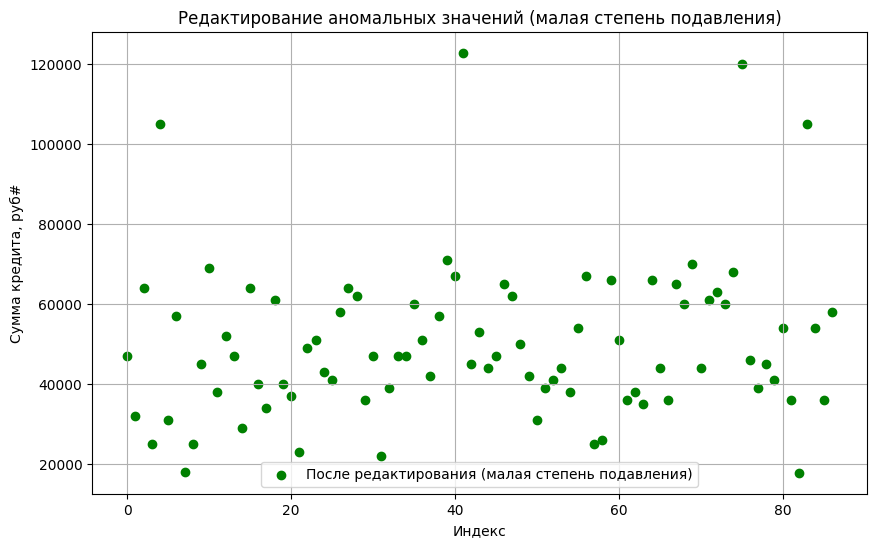

In [341]:
plt.figure(figsize=(10, 6))
plt.scatter(df_anketa.index, df_anketa['Сумма кредита редактированная'], label='После редактирования (малая степень подавления)', color='green')
plt.xlabel('Индекс')
plt.ylabel('Сумма кредита, руб#')
plt.legend()
plt.title('Редактирование аномальных значений (малая степень подавления)')
plt.grid()
plt.show()

Избавились от одной точки, однако аномалии ещё присутствуют. Это логично, потому что мы убрали очень маленький кусочек данных. Попробуем убрать больше

In [342]:
q_low_strong = df_anketa['Сумма кредита, руб#'].quantile(0.05)
q_high_strong = df_anketa['Сумма кредита, руб#'].quantile(0.95)
df_anketa['Сумма кредита редактированная сильная'] = df_anketa['Сумма кредита, руб#'].clip(lower=q_low_strong, upper=q_high_strong)


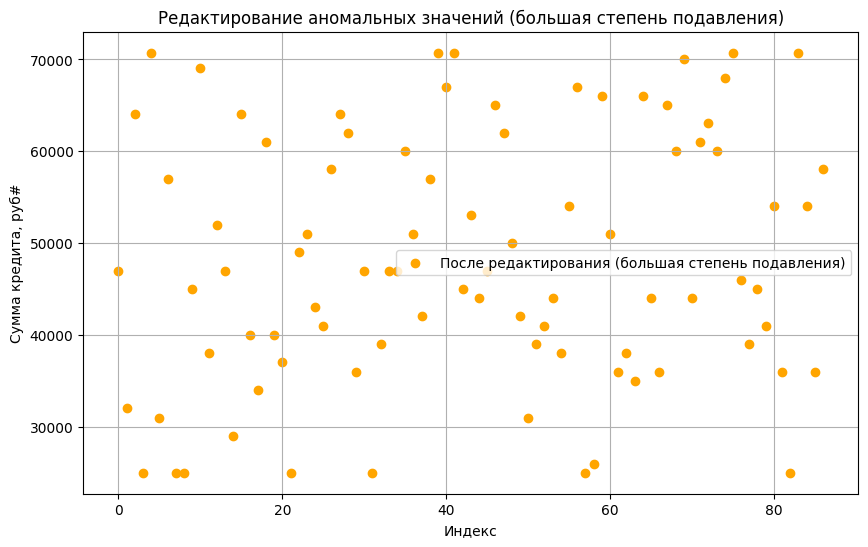

In [343]:
plt.figure(figsize=(10, 6))
plt.scatter(df_anketa.index, df_anketa['Сумма кредита редактированная сильная'], label='После редактирования (большая степень подавления)', color='orange')
plt.xlabel('Индекс')
plt.ylabel('Сумма кредита, руб#')
plt.legend()
plt.title('Редактирование аномальных значений (большая степень подавления)')
plt.grid()
plt.show()

Теперь аномалий нет!

# Задание 3. Сглаживание и очистка от шумов.

In [344]:
df_website = pd.read_csv('dynamics_website.txt', sep='\t', encoding="cp1251")
df_website.head()

,Дата,Посещения
0,01.01.2009,"163,654"
1,01.12.2008,"180,472"
2,01.11.2008,"184,68"
3,01.10.2008,"190,564"
4,01.09.2008,"164,578"


In [345]:
df_website['Посещения'] = df_website['Посещения'].str.replace(',', '.').astype(float)
df_website['Дата'] = pd.to_datetime(df_website['Дата'], format='%d.%m.%Y')
df_website.head()

,Дата,Посещения
0,2009-01-01,163.654
1,2008-12-01,180.472
2,2008-11-01,184.680
3,2008-10-01,190.564
4,2008-09-01,164.578


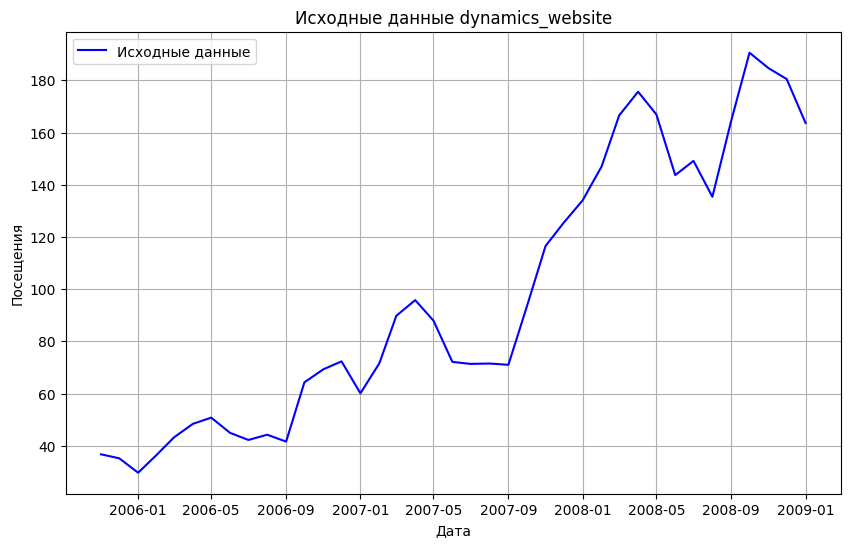

In [346]:
plt.figure(figsize=(10, 6))
plt.plot(df_website['Дата'], df_website['Посещения'], label='Исходные данные', color='blue')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend()
plt.title('Исходные данные dynamics_website')
plt.grid()
plt.show()

Шум в машинном обучении — это случайные или нерелевантные данные, которые вмешиваются в процесс обучения. Они могут привести к непредсказуемым ситуациям, отличным от того, что ожидали. Шум возникает из-за ошибок при сборе данных, ошибок измерений, изменчивости данных и других причин. На графике шум представляет собой колебания, которые отклоняются от основной тенденции роста числа посещений. Шум виден в виде резких перепадов значений, которые не являются частью общей закономерности. Например, В период с конца 2006 до начала 2007 года есть резкое увеличение, за которым следует падение. Это видимый шум, который не вписывается в основной восходящий тренд

Чтобы избавиться от шума на графике, можно использовать методы сглаживания данных. Скользящее среднее — это простой и эффективный способ сгладить данные. Оно вычисляет среднее значение в скользящем окне фиксированного размера, тем самым снижая влияние кратковременных колебаний. Пример: 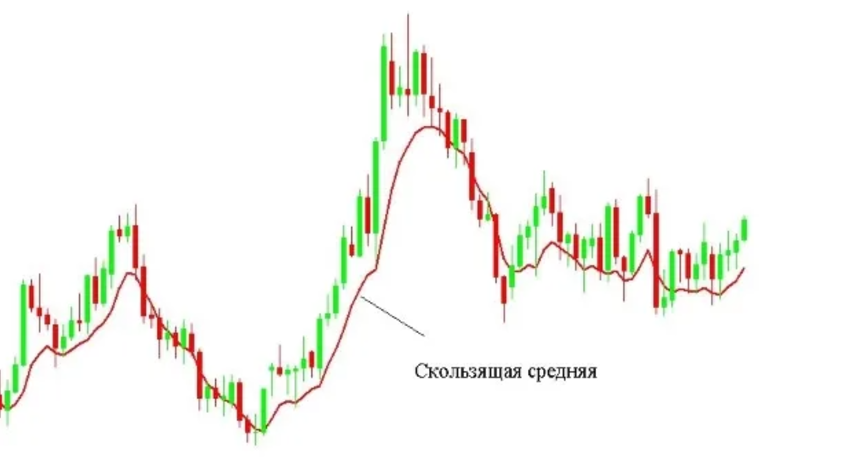

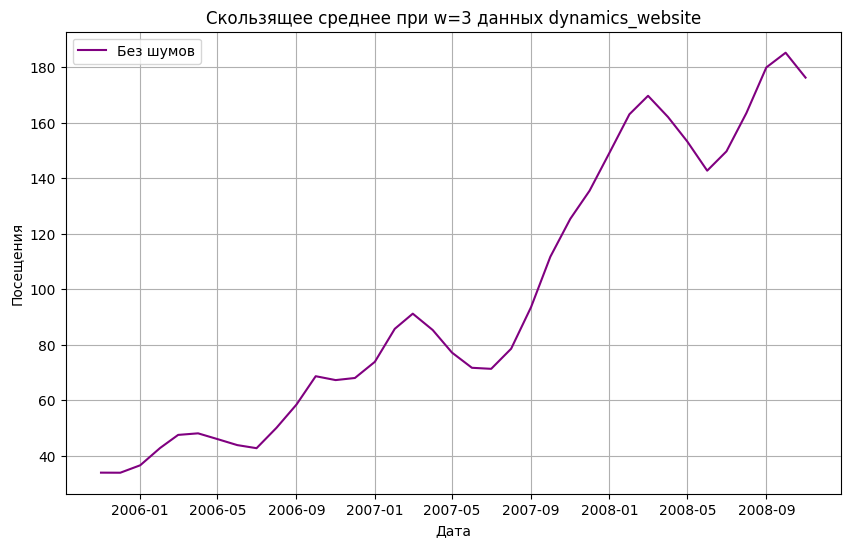

In [347]:
df_website['Скользящее среднее при w=3'] = df_website['Посещения'].rolling(window=3).mean()
# window - количество значений, которые будут использоваться для вычисления среднего значения на каждой итерации
# window=3 означает, что среднее значение будет рассчитываться на основе трех последовательных значений.

plt.figure(figsize=(10, 6))
plt.plot(df_website['Дата'], df_website['Скользящее среднее при w=3'], label='Без шумов', color='purple')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend()
plt.title('Скользящее среднее при w=3 данных dynamics_website')
plt.grid()
plt.show()

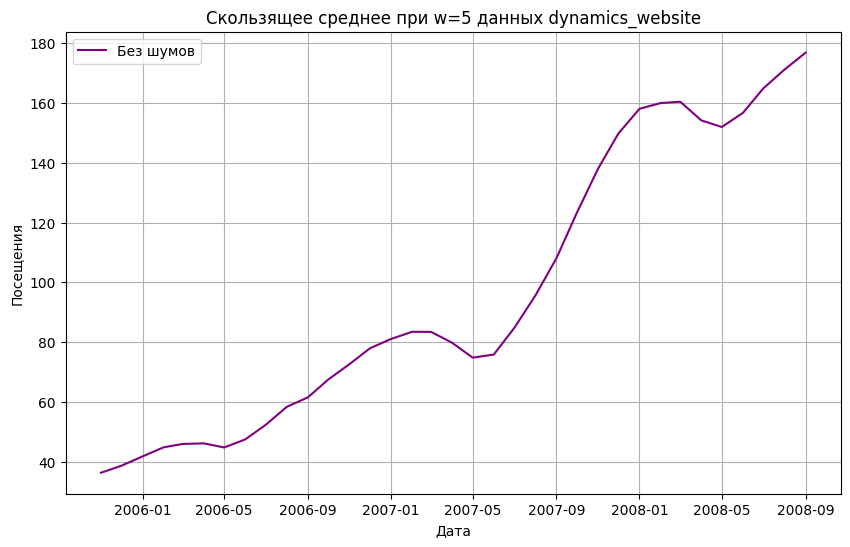

In [348]:
df_website['Скользящее среднее при w=5'] = df_website['Посещения'].rolling(window=5).mean()

plt.figure(figsize=(10, 6))
plt.plot(df_website['Дата'], df_website['Скользящее среднее при w=5'], label='Без шумов', color='purple')
plt.xlabel('Дата')
plt.ylabel('Посещения')
plt.legend()
plt.title('Скользящее среднее при w=5 данных dynamics_website')
plt.grid()
plt.show()

Теперь мы избавились от шумов

# Задание для самостоятельной работы

Картинка, которая хорошо показывает шум и анамалии: 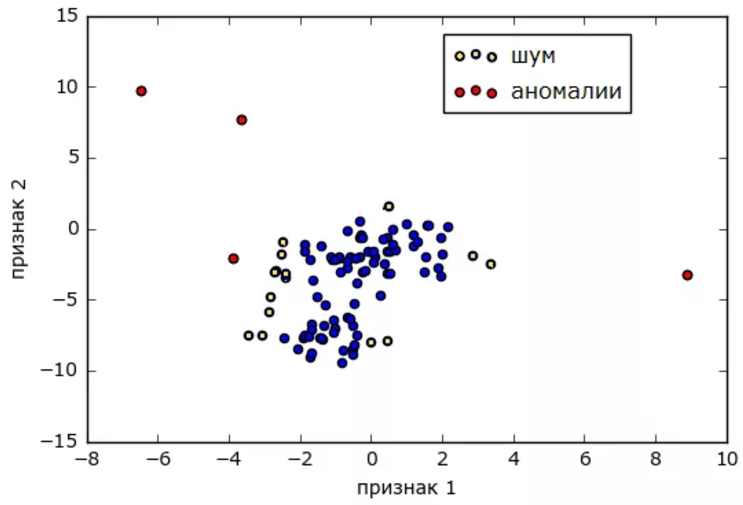

In [349]:
df_trade = pd.read_csv('Trade.txt', sep='\t',  encoding="cp1251")
df_trade.head()


,Дата (Год + Месяц),Количество
0,2000-M01,462523.4190
1,2000-M02,633208.1960
2,2000-M03,660159.2990
3,2000-M04,617455.3417
4,2000-M05,597354.4794


In [350]:
df_trade['Количество'] = df_trade['Количество'].astype(float)
df_trade["Дата (Год + Месяц)"] = pd.to_datetime(df_trade["Дата (Год + Месяц)"].str.replace('M', ''), format="%Y-%m")
df_trade.head()


,Дата (Год + Месяц),Количество
0,2000-01-01,462523.4190
1,2000-02-01,633208.1960
2,2000-03-01,660159.2990
3,2000-04-01,617455.3417
4,2000-05-01,597354.4794


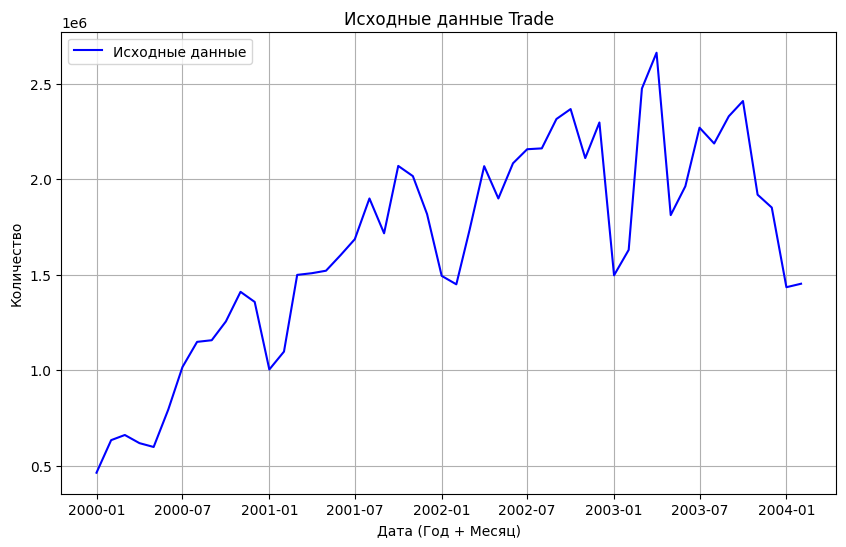

In [351]:
plt.figure(figsize=(10, 6))
plt.plot(df_trade['Дата (Год + Месяц)'], df_trade['Количество'], label='Исходные данные', color='blue')
plt.xlabel('Дата (Год + Месяц)')
plt.ylabel('Количество')
plt.legend()
plt.title('Исходные данные Trade')
plt.grid()
plt.show()

In [352]:
q_low_trade = df_trade['Количество'].quantile(0.05)
q_high_trade = df_trade['Количество'].quantile(0.95)
df_trade['Количество_редактированная'] = df_trade['Количество'].clip(lower=q_low_trade, upper=q_high_trade)
df_trade['Количество_сглаженная'] = df_trade['Количество_редактированная'].rolling(window=8).mean()


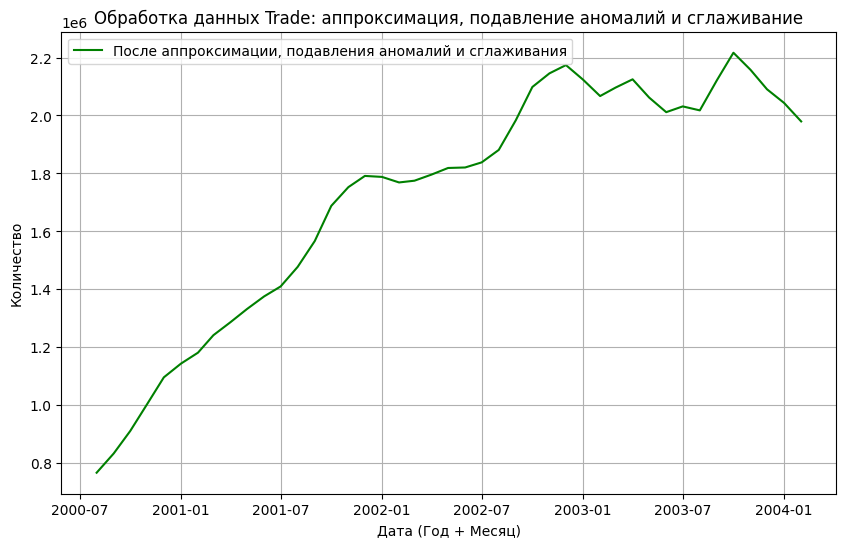

In [353]:
plt.figure(figsize=(10, 6))
plt.plot(df_trade['Дата (Год + Месяц)'], df_trade['Количество_сглаженная'], label='После аппроксимации, подавления аномалий и сглаживания', color='green')
plt.xlabel('Дата (Год + Месяц)')
plt.ylabel('Количество')
plt.legend()
plt.title('Обработка данных Trade: аппроксимация, подавление аномалий и сглаживание')
plt.grid()
plt.show()